Harris Corner Detection
In really simplified way, if change is small in one direction it is edge, and if they are both big then it is corner.
image.png source: https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

path ="Chess_Board.png"
path2 ="landscape.jpg"
path3 ="pear.jpg"

In [2]:
image = cv2.imread(path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray.shape

(600, 600)

In [3]:
image.shape

(600, 600, 3)

In [4]:
image_channel_first = np.moveaxis(image,-1,0)
image_channel_first.shape

(3, 600, 600)

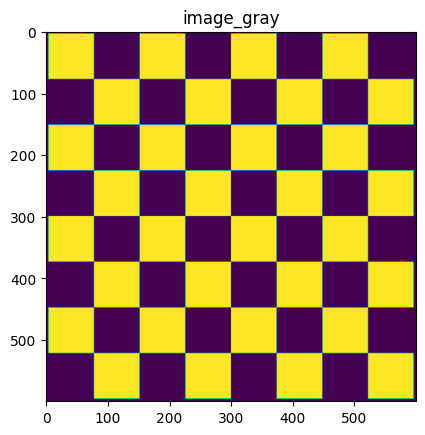

In [5]:
plt.imshow(image_gray)#, cmap="Greys")
plt.title("image_gray")
plt.show()

In [6]:
gray_float = np.float32(image_gray)
gray_float.dtype

dtype('float32')

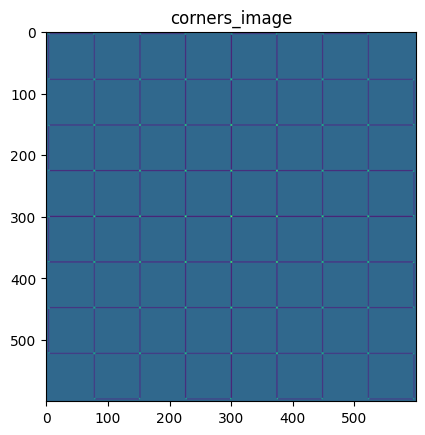

In [7]:
corners_image = cv2.cornerHarris(gray_float,2,3,0.04)
plt.imshow(corners_image)#, cmap="Greys")
plt.title("corners_image")
plt.show()

In [8]:
_, corners_image_with_threshold = cv2.threshold(corners_image, 50,255,cv2.THRESH_BINARY)

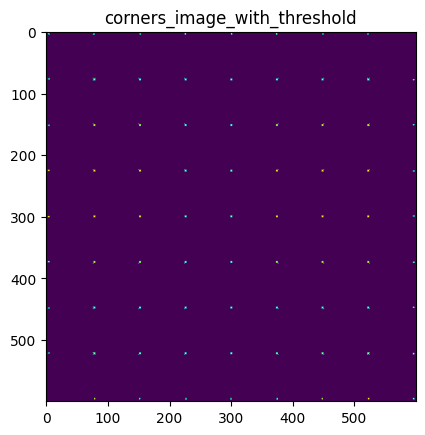

In [9]:
plt.imshow(corners_image_with_threshold)#, cmap="Greys")
plt.title("corners_image_with_threshold")
plt.show()

In [10]:
y_kernel = np.array([[1,2,1],
                     [0,0,0],
                     [-1,-2,-1]]).astype(np.float32)

x_kernel = np.array([[1,0,-1],
                     [2,0,-2],
                     [1,0,-1]]).astype(np.float32)

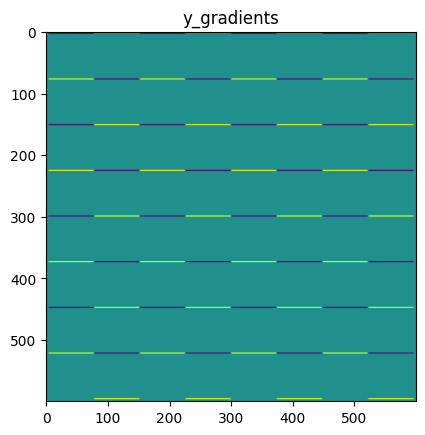

In [11]:
y_gradients = cv2.filter2D(gray_float,-1,y_kernel)

plt.imshow(y_gradients)#, cmap="Greys")
plt.title("y_gradients")
plt.show()

In [12]:
cv2.imwrite("y_gradients.jpg", y_gradients)

True

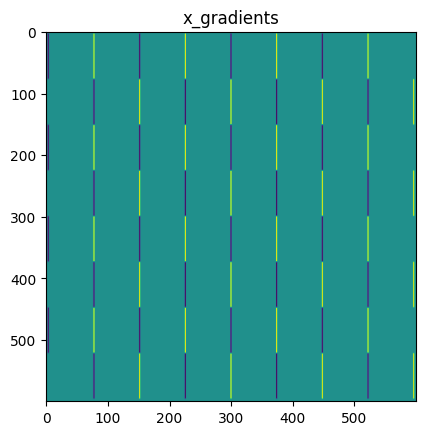

In [13]:
x_gradients = cv2.filter2D(gray_float,-1,x_kernel)
plt.imshow(x_gradients)#, cmap="Greys")
plt.title("x_gradients")
plt.show()

In [14]:
gray_float.shape

(600, 600)

In [15]:
gradients_matrix = np.zeros((2,2,*gray_float.shape))
gradients_matrix.shape


(2, 2, 600, 600)

In [16]:
gradients_matrix[0][0] = x_gradients**2
gradients_matrix[0][1] = x_gradients*y_gradients
gradients_matrix[1][0] = x_gradients*y_gradients
gradients_matrix[1][1] = y_gradients**2

In [17]:
gradients_matrix.shape


(2, 2, 600, 600)

In [18]:
gradients_last_matrix = np.moveaxis(gradients_matrix,[1,0],[-2,-1])
gradients_last_matrix.shape

(600, 600, 2, 2)

In [19]:
gradients_last_matrix[0][0]


array([[0., 0.],
       [0., 0.]])

In [20]:
gradients_last_matrix[300][300]


array([[260100., 260100.],
       [260100., 260100.]])

In [21]:
k = 0.04
r_of_image = np.zeros((gray_float.shape))

for i in range(1,gray_float.shape[0]-1):
    for u in range(1,gray_float.shape[0]-1):
        m= np.sum(gradients_last_matrix[i-1:i+1,u-1:u+1],axis=(0,1))
        r_of_image[i][u] = np.linalg.det(m)-k*(np.trace(m))**2

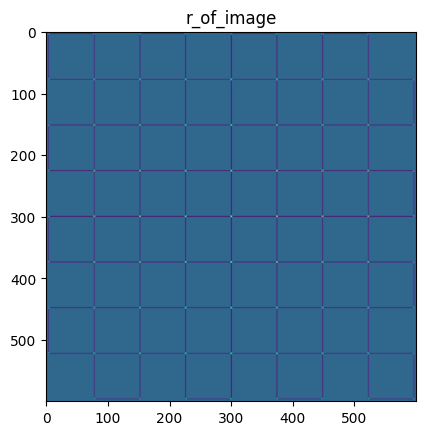

In [22]:
plt.imshow(r_of_image)#, cmap="Greys")
plt.title("r_of_image")
plt.show()

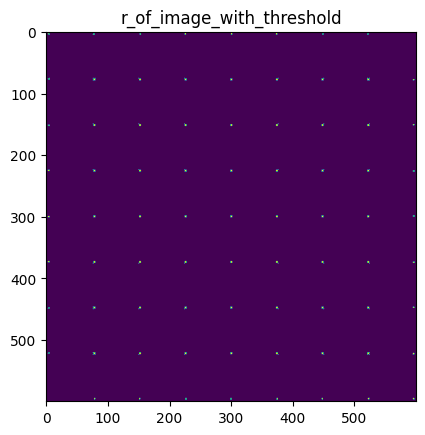

In [23]:
_, r_of_image_with_threshold = cv2.threshold(r_of_image, 10,255,cv2.THRESH_BINARY)

plt.imshow(r_of_image_with_threshold)#, cmap="Greys")
plt.title("r_of_image_with_threshold")
plt.show()